In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt  


In [2]:
from sklearn.datasets import make_regression 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 

In [3]:
import seaborn as sns

In [4]:
#creating data sets
x , y = make_regression(n_samples= 100 , n_features= 1 , n_informative =1 , n_targets= 1  , noise = 20  , random_state= 13 )

In [5]:
xtrain ,xtest , ytrain , ytest = train_test_split(x , y , test_size = 20  ,  random_state = 2 )  

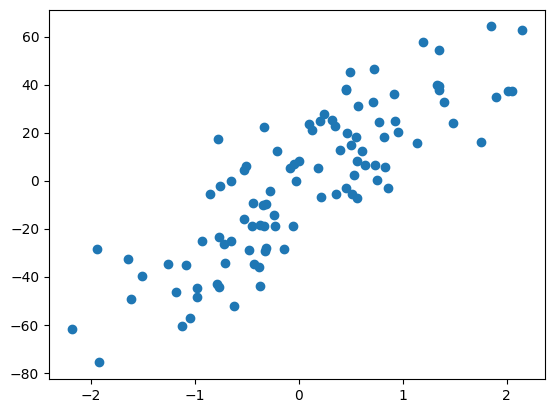

In [6]:
plt.scatter(x  , y )

# Using linear regression 

In [7]:
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(xtrain , ytrain) 

LinearRegression()

In [8]:
lr.coef_ , lr.intercept_

(array([28.12597332]), -2.2710144261783825)

In [9]:
r2_score(ytest , lr.predict(xtest))

0.6345158782661012

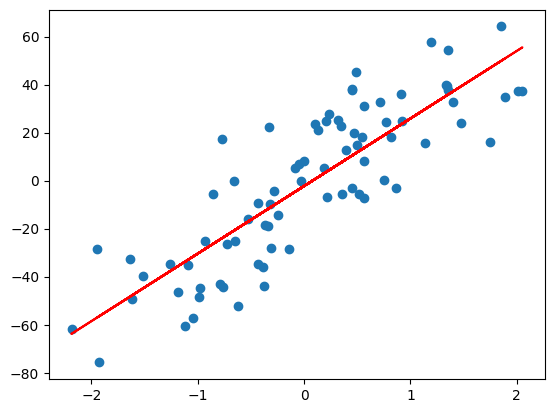

In [10]:
plt.scatter(xtrain , ytrain )

plt.plot(xtrain, lr.predict(xtrain) , 'r')

# Lasso Regression 


In [11]:
from sklearn.linear_model  import Lasso
reg = Lasso(alpha = 20 )
reg.fit(xtrain , ytrain )

Lasso(alpha=20)

In [12]:
reg_pred = reg.predict(xtest)

In [13]:
r2_score(ytest , reg_pred)

0.29861568367028757

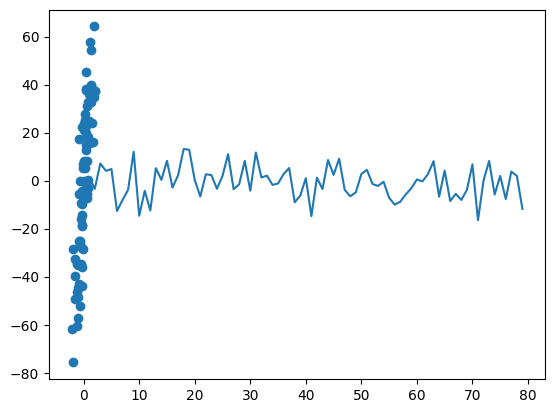

In [14]:
plt.scatter(xtrain , ytrain)
plt.plot(reg.predict(xtrain))
plt.show()

Create a function for laso for alpha valuues 


In [15]:

def reg_fun(xtrain , ytrain ,alpha_val ) :
    reg = Lasso(alpha = alpha_val) 
    reg.fit(xtrain, ytrain) 
    ytrain_pred  = reg.predict(xtrain) 
    plt.scatter(xtrain , ytrain ) 
    plt.plot(xtrain , ytrain_pred)
    

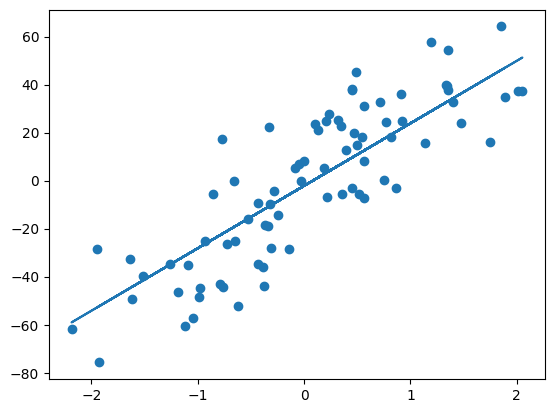

In [16]:
reg_fun(xtrain , ytrain , 2)

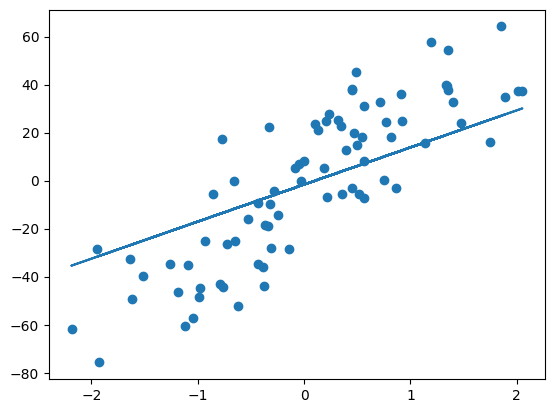

In [17]:
reg_fun(xtrain , ytrain , 12)

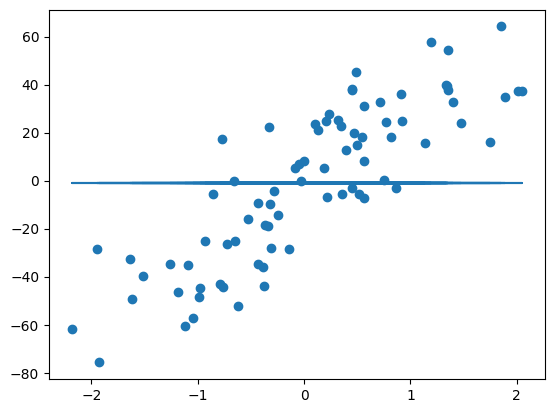

In [18]:
reg_fun(xtrain , ytrain , 80) #under fitting 

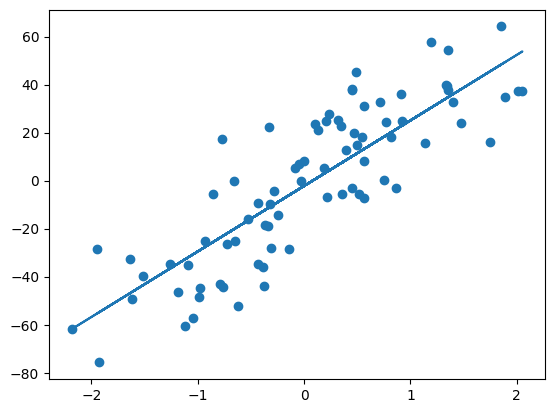

In [19]:
reg_fun(xtrain , ytrain ,0.8)

# overfitting

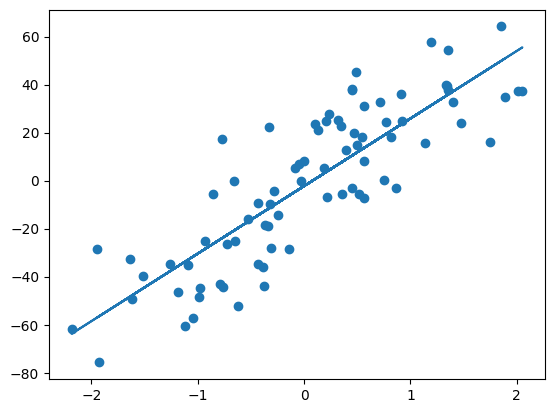

In [20]:
reg_fun(xtrain , ytrain ,0.0008) 

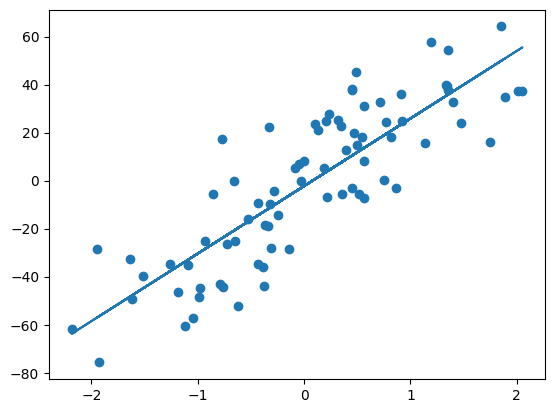

In [21]:
reg_fun(xtrain , ytrain ,0.000000000000008) 

A T O N C E 


C:\Users\UJJWAL\AppData\Local\Temp\ipykernel_7400\1436209015.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  reg.fit(xtrain , ytrain )
D:\software\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
D:\software\python\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.205e+04, tolerance: 8.397e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


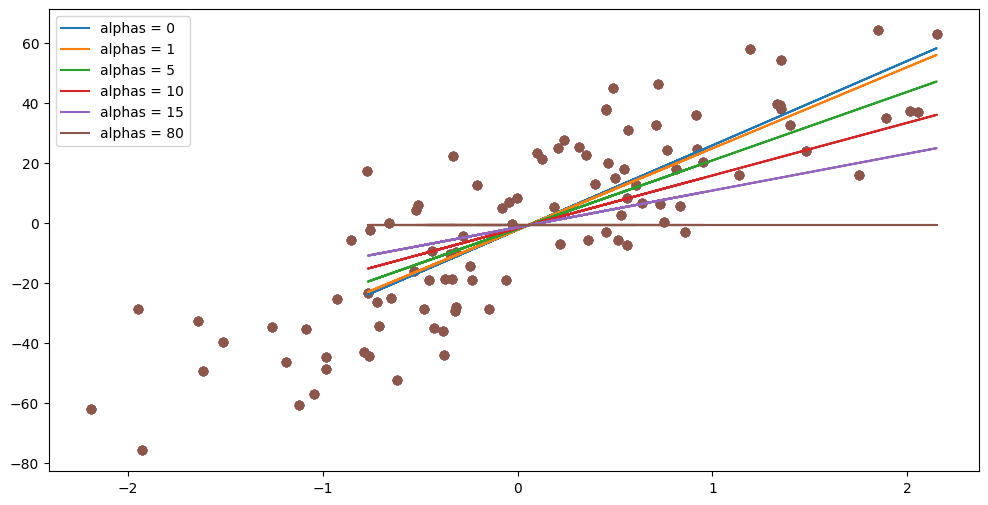

In [22]:
alphas = [ 0 , 1 , 5 , 10 , 15 , 80  ] 
plt.figure(figsize = (12 , 6 ))
for i  in alphas :
    reg = Lasso(alpha = i ) 
    reg.fit(xtrain , ytrain ) 
    plt.scatter(x , y) 
    plt.plot(xtest , reg.predict(xtest ) , label = f"alphas = {i}"  )
    
plt.legend()
plt.show()

## Now By using polynomial equations

In [23]:
m = 100
x = 5 * np.random.rand(m, 1) - 2
y = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

NameError: name 'x1' is not defined

In [ ]:
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeature


In [ ]:
def lasso_pred(x , y , alpha ) :
    model = Pipeline( [ 
        ('poly_feats' , PolynomialFeatures(degree = 14 )),
        ('laso_reg '  , Lasso(alpha = alpha )) 
    
    ])
    model.fit(x , y ) 
    return model.predict(x) 
#setting values for alphas 
alphas = [  0 , 0.1 , 1  ] 
#colors 
c = ['r' , 'g' , 'b' ] 

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b+', label='Datapoints')

#train_test_split 
xtrain ,xtest , ytrain , ytest = train_test_split(x , y , random_state = 12 , test_size = 0.2 )
for a , c in zip(alphas , c ) :
    y_pred = lasso_pred(xtrain  , ytrain  , a )
    plt.scatter(xtrain , y_pred , c = c  , label = f"Alpha = {a} ")  #note that here  y_pred is prediction of ytrain 
    
plt.show()

    